## ML-Based Structure Detection and Classification
Training an ML model to automatically classify the input data's structure (e.g., orientation, number of calipers, absolue vs. difference radial measurements, etc.) based on extracted features, which can then be routed to a standardized pre-processing pipeline.

In [1]:
import os
import processing as pro
import importlib

Detected DataFrame shape: rows [0, 1966], columns [0, 81].


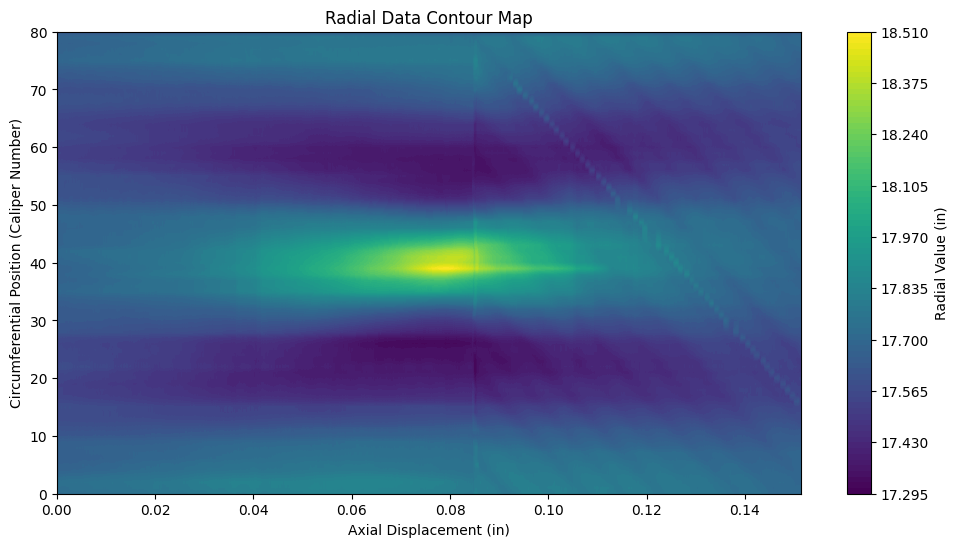

In [114]:
importlib.reload(pro)

raw_folder = 'Raw Data'
feature = 'dent0.csv'
file_path=os.path.join(raw_folder, feature)

df = pro.DataLoader(
    file_path=file_path,
    OD=36,
    WT=0.381,
    unit_radial='mm',
    unit_axial='mm',
    value_type='relative',
    header_row=0,
    axial_index_col=0)

df.plot()

In [109]:
df._df.index

Index([                0.0,  0.0787402000026139, 0.15748040000075195,
       0.19685049999982096, 0.27559070000243485, 0.35433090000057293,
        0.4330711000031868,  0.5118113000013249,  0.5905515000039387,
        0.6692917000020768,
       ...
        150.66937269999994,  150.74811290000255,  150.82685310000068,
         150.9055933000033,  150.98433350000144,  151.06307370000405,
        151.14181390000218,  151.22055410000033,  151.29929430000294,
        151.37803450000106],
      dtype='float64', length=1967)